Quantum teleportation is the transfer of quantum states from one qubit to another i.e the transfer of quantum information from one qubit to another. If you try to transfer by copying information (like in classical computers) in quantum computers, you are implicity doing a measurement which destroys the quantum state that you are trying to transfer from point A to point B. To get around this problem, entanglement is used as a resource to build a quantum teleporation circuit!

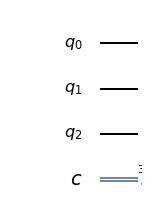

In [1]:
from qiskit import *
circuit = QuantumCircuit(3,3)
%matplotlib inline
circuit.draw(output = 'mpl')

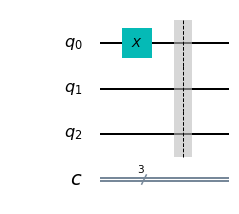

In [2]:
circuit.x(0)
circuit.barrier()
circuit.draw(output = 'mpl')

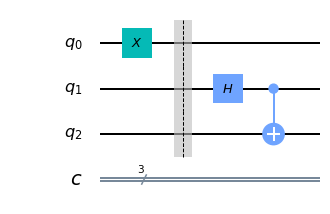

In [3]:
circuit.h(1)
circuit.cx(1,2)
circuit.draw(output = 'mpl')

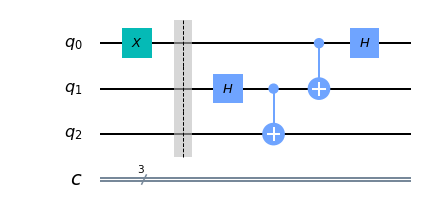

In [4]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

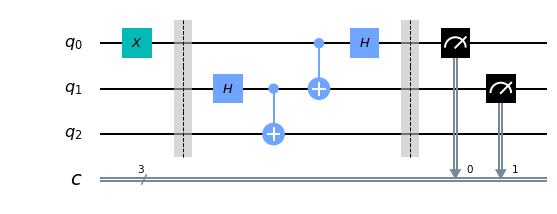

In [5]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

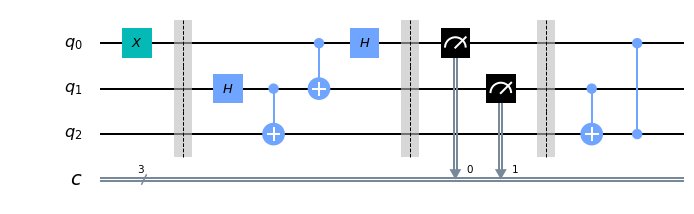

In [6]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

We have now teleported the quantum state of qubit 1 before the 1st barrier to qubit 2.

In [9]:
circuit.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()

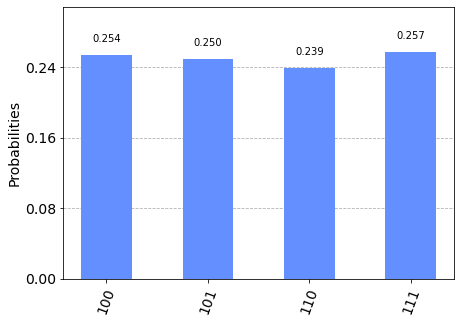

In [10]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

We have measured the value of qubit 2 to classical bit 2. In the histogram the values 100, 101, 110, 111 are respectivity c2 c1 and c0 together. So as you can see c2 is always 1. Thus the quantum state has been teleported.

In [11]:
print(counts)

{'100': 260, '101': 256, '111': 263, '110': 245}
